NAG的准确率为 0.8500706344819114
RMSProp的准确率为 0.8501320557705301
AdaDelta的准确率为 0.8503777409250046
Adam的准确率为 0.8502548983477674


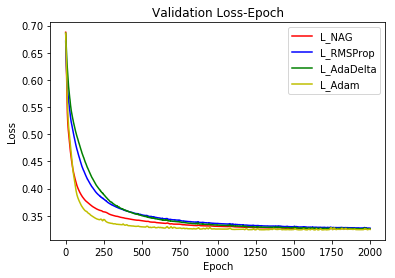

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split 
x_train,y_train = load_svmlight_file("F:/a9a.txt")
x_test,y_test= load_svmlight_file("F:/a9a.t")
x_train=x_train.toarray()
x_test=x_test.toarray()
m_train,n_train= np.shape(x_train)
m_test,n_test= np.shape(x_test)
a=np.ones((m_train))
b=np.ones((m_test))
X_train=np.column_stack((x_train,a))
x_test=np.column_stack((x_test,np.zeros((m_test))))
X_test=np.column_stack((x_test,b))
y_train[y_train==-1]=0
y_test[y_test==-1]=0
w = np.zeros(n_train+1)
epoch =2000
Iteration=range(1,epoch+1)
L_NAG=[]
L_RMSProp=[]
L_AdaDelta=[]
L_Adam=[]
rand=[]
for i in range(1, epoch+1):
    rand.append(random.randint(0,m_train-100))
def logit(x):
    return 1/(1+np.exp(-x))
def NAG(W,γ,η):
    v=0
    for i in range(1, epoch+1):
        j=rand[i-1]
        h=logit(np.dot(X_train[j:j+99],(W-γ*v).transpose()))
        g=np.dot(X_train[j:j+99].transpose(),(h-y_train[j:j+99]))/100
        v=γ*v+η*g
        W=W-v
        h_test = logit(np.dot(X_test,W))
        J_test = -(1/m_test)*np.sum(y_test*np.log(h_test)+(1-y_test)*np.log(1-h_test))
        L_NAG.append(J_test) 
    h_test[h_test>0.5]=1
    h_test[h_test<0.5]=0 
    count=0
    for l in range(len(y_test)):
        if h_test[l]==y_test[l]:
            count +=1
    print("NAG的准确率为",count/m_test)
def RMSProp(W,γ,η,ε):
    G=0
    for i in range(1, epoch+1):
        j=rand[i-1]
        h=logit(np.dot(X_train[j:j+99],W.transpose()))
        g=np.dot(X_train[j:j+99].transpose(),(h-y_train[j:j+99]))/100
        G=γ*G+(1-γ)*np.dot(g.transpose(),g)
        W=W-(η/np.sqrt(G+ε))*g
        h_test = logit(np.dot(X_test,W))
        J_test = -(1/m_test)*np.sum(y_test*np.log(h_test)+(1-y_test)*np.log(1-h_test))
        L_RMSProp.append(J_test) 
    h_test[h_test>0.5]=1
    h_test[h_test<0.5]=0 
    count=0
    for l in range(len(y_test)):
        if h_test[l]==y_test[l]:
            count +=1
    print("RMSProp的准确率为",count/m_test)
def AdaDelta(W,γ,ε):
    G=0
    Δ=0
    for i in range(1, epoch+1):
        j=rand[i-1]
        h=logit(np.dot(X_train[j:j+99],W.transpose()))
        g=np.dot(X_train[j:j+99].transpose(),(h-y_train[j:j+99]))/100
        G=γ*G+(1-γ)*np.dot(g.transpose(),g)
        ΔW=-(np.sqrt(Δ+ε)/np.sqrt(G+ε))*g
        W=W+ΔW
        Δ=γ*Δ+(1-γ)*np.dot(ΔW.transpose(),ΔW)
        h_test = logit(np.dot(X_test,W))
        J_test = -(1/m_test)*np.sum(y_test*np.log(h_test)+(1-y_test)*np.log(1-h_test))
        L_AdaDelta.append(J_test)
    h_test[h_test>0.5]=1
    h_test[h_test<0.5]=0 
    count=0
    for l in range(len(y_test)):
        if h_test[l]==y_test[l]:
            count +=1
    print("AdaDelta的准确率为",count/m_test)
def Adam(W,γ,η,β,ε):
    m=0
    G=0
    for i in range(1, epoch+1):
        j=rand[i-1]
        h=logit(np.dot(X_train[j:j+99],W.transpose()))
        g=np.dot(X_train[j:j+99].transpose(),(h-y_train[j:j+99]))/100
        m=β*m+(1-β)*g
        G=γ*G+(1-γ)*np.dot(g.transpose(),g)
        α=η*(np.sqrt(1-γ)/(1-β))
        W=W-α*m/np.sqrt(G+ε)
        h_test = logit(np.dot(X_test,W))
        J_test = -(1/m_test)*np.sum(y_test*np.log(h_test)+(1-y_test)*np.log(1-h_test))
        L_Adam.append(J_test)
    h_test[h_test>0.5]=1
    h_test[h_test<0.5]=0 
    count=0
    for l in range(len(y_test)):
        if h_test[l]==y_test[l]:
            count +=1
    print("Adam的准确率为",count/m_test)
W=w.transpose()
NAG(W,0.9,0.01)
W=w.transpose()
RMSProp(W,0.9,0.01,1e-5)
W=w.transpose()
AdaDelta(W,0.9,1e-5)
W=w.transpose()
Adam(W,0.9,0.01,0.9,1e-5)
plt.plot(Iteration,L_NAG,color='r',label="L_NAG") 
plt.plot(Iteration,L_RMSProp,color='b',label="L_RMSProp")
plt.plot(Iteration,L_AdaDelta,color='g',label="L_AdaDelta")
plt.plot(Iteration,L_Adam,color='y',label="L_Adam")
plt.title("Validation Loss-Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()